In [1]:
!pip install kaggle
!rm -rf ~/.kaggle
!pwd
import json

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/


/content


In [2]:
!kaggle datasets download -d samuelcortinhas/apples-or-tomatoes-image-classification

  0% 0.00/2.33M [00:00<?, ?B/s]
100% 2.33M/2.33M [00:00<00:00, 90.4MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile ('/content/apples-or-tomatoes-image-classification.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
#cnn model

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [5]:
train_ds = keras.utils.image_dataset_from_directory(
directory = '/content/train' ,
labels = 'inferred',
label_mode = 'int',

batch_size= 32,
image_size=(256,256)
)

Found 294 files belonging to 2 classes.


In [6]:
validation_ds = keras.utils.image_dataset_from_directory(
directory = '/content/train' ,
labels = 'inferred',
label_mode = 'int',

batch_size= 32,
image_size=(256,256)
)

Found 294 files belonging to 2 classes.


In [ ]:
#normallized

In [7]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image.label

  train_ds = train/ds.map(process)
  validation_ds = validation_ds.map(process)

In [ ]:
#cnn

In [8]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu' ,input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [9]:
model = Sequential()
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu' ,input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [10]:
model = Sequential()
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu' ,input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [11]:
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))




In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 128)    0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2064512)           0         
                                                                 
 dense (Dense)               (None, 128)               264257664 
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                      

In [13]:
from keras.losses import binary_crossentropy
from keras.optimizers import Adam


In [14]:
model.compile(optimizer= 'adam' , loss='binary_crossentropy' ,
              metrics =['accuracy'])

In [15]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
10/10 [==============================] - 159s 16s/step - loss: 10719.9980 - accuracy: 0.4966 - val_loss: 806.0641 - val_accuracy: 0.6803
Epoch 2/10
10/10 [==============================] - 136s 14s/step - loss: 479.7637 - accuracy: 0.7007 - val_loss: 175.0415 - val_accuracy: 0.5986
Epoch 3/10
10/10 [==============================] - 156s 16s/step - loss: 221.0873 - accuracy: 0.6497 - val_loss: 76.9225 - val_accuracy: 0.7823
Epoch 4/10
10/10 [==============================] - 148s 15s/step - loss: 49.9922 - accuracy: 0.8197 - val_loss: 154.7507 - val_accuracy: 0.5340
Epoch 5/10
10/10 [==============================] - 142s 14s/step - loss: 22.1459 - accuracy: 0.8707 - val_loss: 6.8294 - val_accuracy: 0.8878
Epoch 6/10
10/10 [==============================] - 134s 13s/step - loss: 3.8604 - accuracy: 0.9422 - val_loss: 8.8880 - val_accuracy: 0.8435
Epoch 7/10
10/10 [==============================] - 134s 13s/step - loss: 4.1405 - accuracy: 0.9252 - val_loss: 4.8482 - val_accura

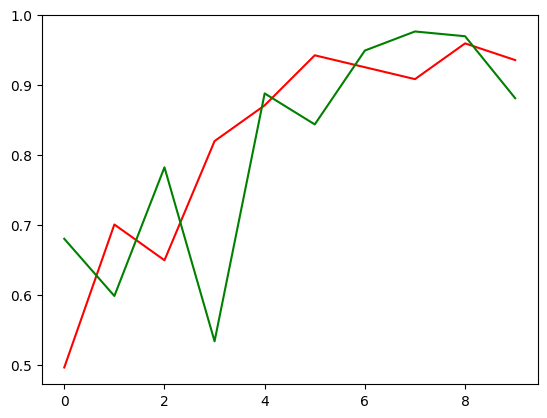

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red' ,label='train')
plt.plot(history.history['val_accuracy'],color='green' ,label='validation')
